# 感知机

## 引入必须的组件

In [2]:
import pandas as pd #loading such packages
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline# a component of the drawing

UsageError: unrecognized arguments: a component of the drawing


## 导入数据组 

In [8]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target#创建新的列
df.label.value_counts()
#一个计数函数，得知有三种类，这里感知机做二分类，因此之后我们提取前一百行

2    50
1    50
0    50
Name: label, dtype: int64

In [17]:
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']

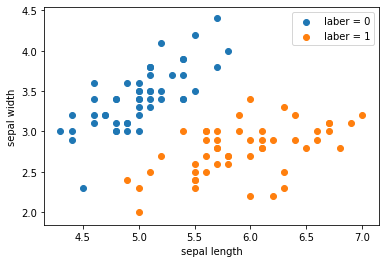

In [23]:
#原始数据可视化
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='laber = 0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='laber = 1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [ ]:
data = np.array(df.iloc[:100, [0, 1, -1]])
#提取前一百个行

In [ ]:
X, y = data[:,:-1], data[:,-1]
# X定义为data中除去label列，y定义为data中的最后一列

In [ ]:
y = np.array([1 if i == 1 else -1 for i in y])
# 将y中的0改为-1

## Perceptron

In [ ]:
# 数据线性可分，二分类数据
# 此处为一元一次线性方程
class Model:
    def __init__(self):#定义基本method，self为一个占位符，指代某一个对象
        self.w = np.ones(len(data[0]) - 1, dtype=np.float32)
        #w⋅x+b=0 对应一个超平面S，w是超平面的法向量，b是超平面的截距
        self.b = 0
        self.l_rate = 0.1 #learning rate，需要找到一个合适大小
        self.data = data

    def sign(self, x, w, b):
        y = np.dot(x, w) + b #这里的y为局部变量，与之前的y无关，dot()表示点积或矩阵乘法
        return y

    # 随机梯度下降法
    def fit(self, X_train, y_train):
        is_wrong = False #一个开关变量
        while not is_wrong:
            wrong_count = 0#记录判断错误的点的个数
            for d in range(len(X_train)):
                X = X_train[d]
                y = y_train[d]
                if y * self.sign(X, self.w, self.b) <= 0:
                    self.w = self.w + self.l_rate * np.dot(y, X)
                    self.b = self.b + self.l_rate * y
                    wrong_count += 1    
            if wrong_count == 0:#要求遍历每个点，都判断正确
                is_wrong = True
        return 'Perceptron Model!'

    def score(self):
        pass